### TASK-3

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

In [20]:
# Load metadata
url = 'C:\\Users\\Bindu\\Documents\\Arcada\\Machine Learning for Predictive\\Homework-3\\Chest_xray_Corona_Metadata.csv'
data= pd.read_csv(url)
data.tail()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus
5909,5932,person1632_virus_2827.jpeg,Pnemonia,TEST,NaN,Virus


In [24]:
# root directory where the 'train' and 'test' folders exist
root_dir = 'C:\\Users\\Bindu\\Documents\\Arcada\\Machine Learning for Predictive\\Homework-3\\Coronahack-Chest-XRay-Dataset'

# image paths based on 'train' and 'test' folders
data['image_path'] = data.apply(lambda row: os.path.join(root_dir, row['Dataset_type'], row['X_ray_image_name']), axis=1)

# Split data into train and test
train_df = data[data['Dataset_type'] == 'TRAIN']
test_df = data[data['Dataset_type'] == 'TEST']
label_encoder = LabelEncoder()
train_df.loc[:,'Label'] = label_encoder.fit_transform(train_df['Label'])
test_df.loc[:,'Label'] = label_encoder.transform(test_df['Label'])

In [22]:
# Data Augmentation and Image Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Generate batches of augmented data
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory=root_dir,
                                                    x_col='image_path',
                                                    y_col='Label',
                                                    class_mode='raw',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  directory=root_dir,
                                                  x_col='image_path',
                                                  y_col='Label',
                                                  class_mode='raw',
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size)




Found 5286 validated image filenames.
Found 624 validated image filenames.


Epoch 1/10
165/165 [==============================] - 341s 2s/step - loss: 0.4011 - accuracy: 0.8316 - val_loss: 0.5260 - val_accuracy: 0.7928
Epoch 2/10
165/165 [==============================] - 314s 2s/step - loss: 0.2596 - accuracy: 0.8919 - val_loss: 0.4597 - val_accuracy: 0.7895
Epoch 3/10
165/165 [==============================] - 320s 2s/step - loss: 0.2216 - accuracy: 0.9102 - val_loss: 0.4446 - val_accuracy: 0.8125
Epoch 4/10
165/165 [==============================] - 313s 2s/step - loss: 0.2004 - accuracy: 0.9220 - val_loss: 0.5020 - val_accuracy: 0.8043
Epoch 5/10
165/165 [==============================] - 311s 2s/step - loss: 0.1841 - accuracy: 0.9263 - val_loss: 0.3813 - val_accuracy: 0.8405
Epoch 6/10
165/165 [==============================] - 292s 2s/step - loss: 0.1604 - accuracy: 0.9399 - val_loss: 0.4444 - val_accuracy: 0.8470
Epoch 7/10
165/165 [==============================] - 233s 1s/step - loss: 0.1376 - accuracy: 0.9509 - val_loss: 0.5606 - val_accuracy: 0.7895

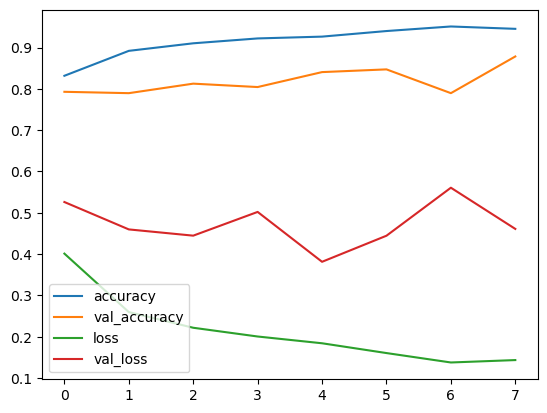

19/19 [==============================] - 14s 718ms/step - loss: 0.4379 - accuracy: 0.8799
Test Accuracy: 0.8799341917037964


In [23]:
# Model CNN Building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size,
                    callbacks=[EarlyStopping(patience=3)])

# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_acc}")


### Summary: 
The Convolutional Neural Network (CNN) model trained for image classification. The model was trained for 8 epochs, and its performance on the test set resulted in an accuracy of approximately 88%.

The training started with a loss of 0.4011 and an accuracy of 83.16%.
By the end of training (after 8 epochs), the loss decreased to 0.1434, and the accuracy increased to 94.52%.
The validation accuracy varied across epochs, reaching a peak of 87.83% around the 8th epoch.
From these results, it seems the model performed reasonably well, achieving a relatively high accuracy on the test set.